0.0738362800597
-0.412938465158
0.879357879724


/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.3467398604
1.44208330622
1.44734034695
1.45294178999
1.45888366853
1.47167752348
1.48576343565
1.50110501771
1.5176641775
1.52336734423
1.52919642569
1.53514998909
1.54122658935
0.762667246904
0.181590957413
0.677834852083
1.36422178178
1.45516205032
1.45611975287
1.45720465097
1.45841645183


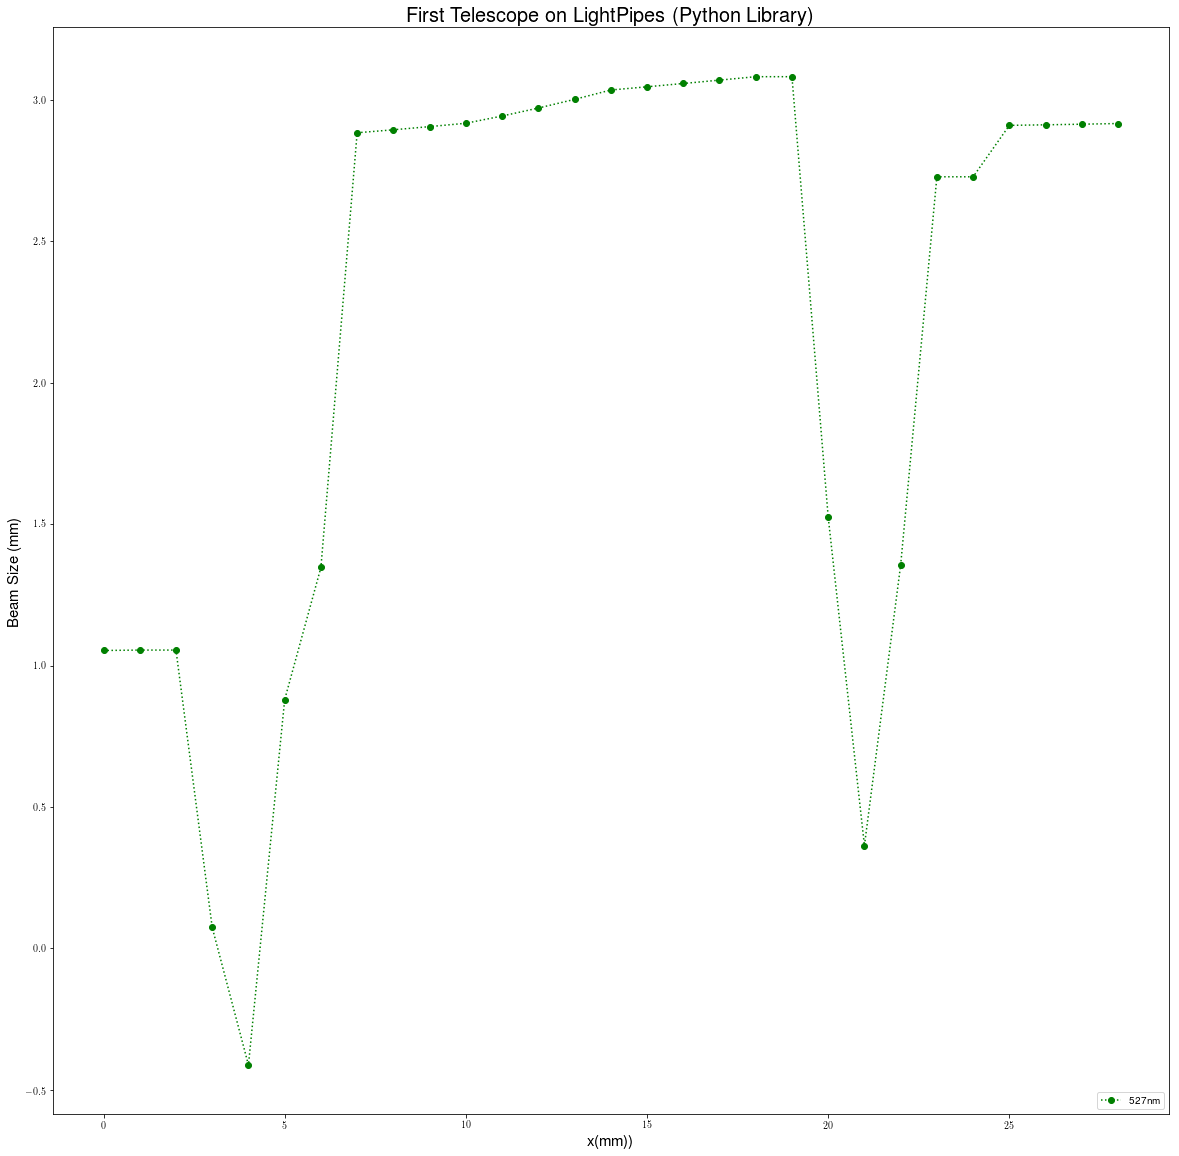

In [108]:
from LightPipes import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pylab as pl
import numpy as np
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

GridSize = 18*mm
GridDimension = 2000
lambda_ = 527*nm

waist_values = []
pos = []

#ask brendan about this
R=(1)*mm
xs =0;ys=0
Field = Begin(GridSize, lambda_, GridDimension)

#Field = GaussAperture(R,xs,ys,1,Field)
Field = GaussHermite(0, 0, 1, R, Field)


Field = Forvard(2000*mm, Field)
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values.append(2*popt[2])


Field = Forvard(27*mm, Field)
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values.append(2*popt[2])

f1 = 568*mm
f2 = 1600*mm
f_relay = 6200*mm
#let's put the lens
Field = Lens(f1,0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values.append(2*popt[2])

drift_l1_m2 = [517]*4


for i in drift_l1_m2:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(popt[2])
    
Field = Forvard(100*mm, Field)   
Field = Lens(f2,0,0,Field)

drift_l2_m3 = [770.5]*4

for i in drift_l2_m3:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)


    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])

drift_insidegallery = [1530.25]*4

for i in drift_insidegallery:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)


    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])

drift_m3_l4 = [503.075]*4

for i in drift_m3_l4:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])
    
Field = Lens(f_relay, 0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values.append(2*popt[2])

Field = Forvard(381.7*mm, Field)

drift_iptable = [2934.575]*4

for i in drift_iptable:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])

Field = Forvard(381.7*mm, Field)

Field = Lens(f_relay, 0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values.append(2*popt[2])

drift_l4_comp = [472.5]*4


for i in drift_l4_comp:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])
    


    
plt.figure(figsize=(20,20))
plt.plot(waist_values, linestyle = ':', marker = 'o', color = 'green', label = '527nm')
plt.xlabel('x(mm))', fontsize=15)
plt.ylabel('Beam Size (mm)',fontsize=15)
plt.title('First Telescope on LightPipes (Python Library)',fontsize=20)
plt.tick_params(axis = 'both', labelsize=10)
plt.legend(loc = 'lower right')

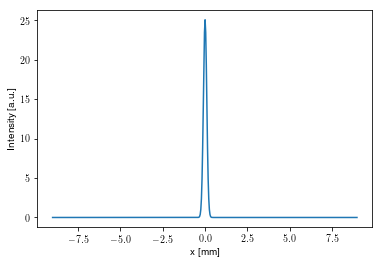

/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.199418245067


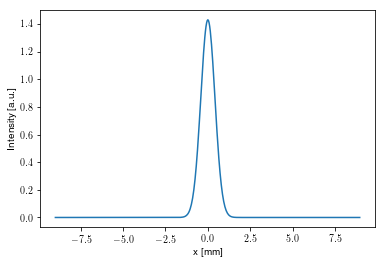

-0.8345133429


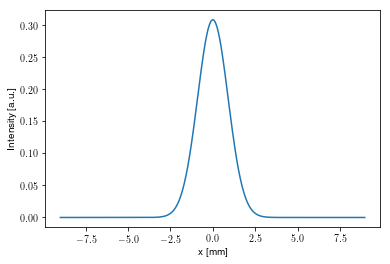

1.79793978197


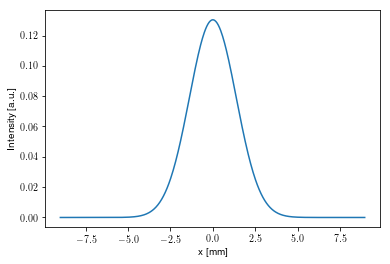

2.76555482934


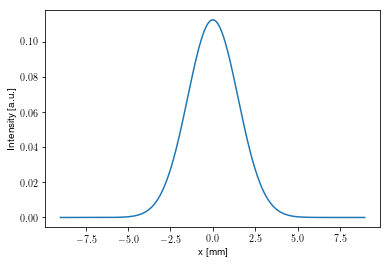

2.97482911058


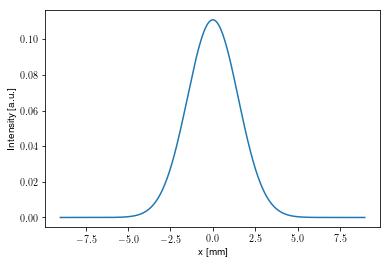

2.99826989041


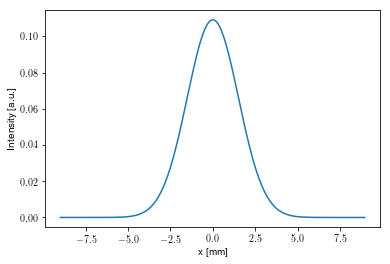

3.02313904168


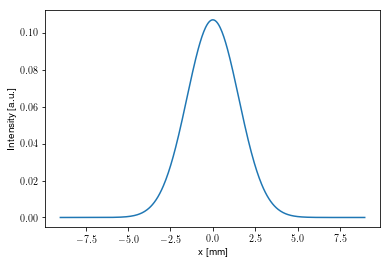

3.04940160681


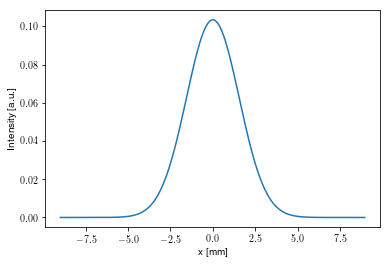

3.10555104348


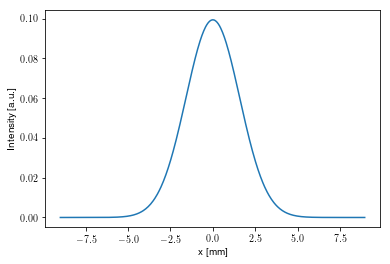

3.16677057586


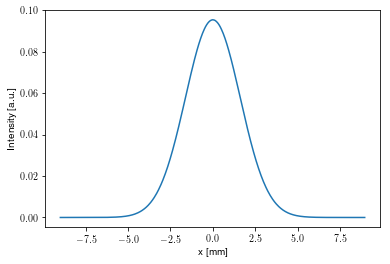

3.23277208579


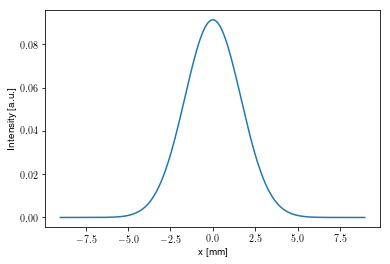

3.30326882736


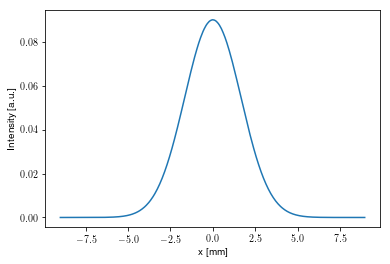

3.32737876566


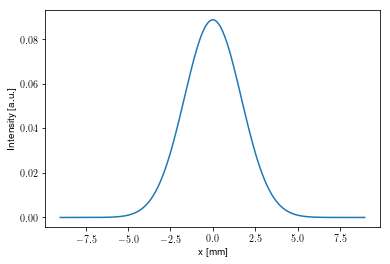

3.35193423572


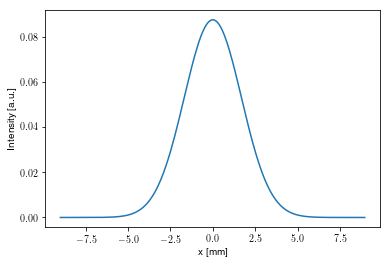

3.37692548565


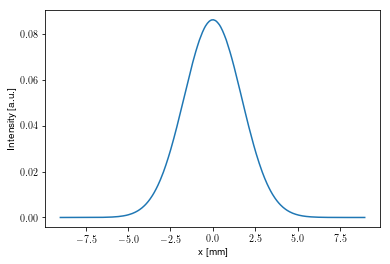

3.40234293022


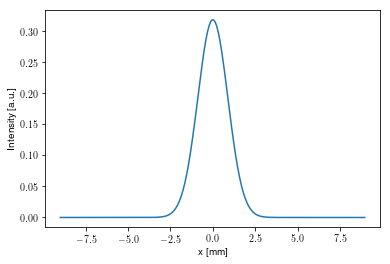

1.76892243784


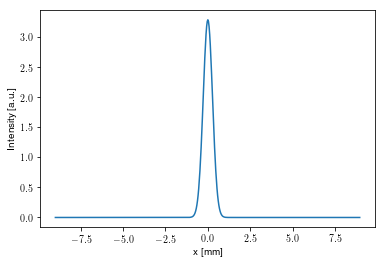

0.550622620973


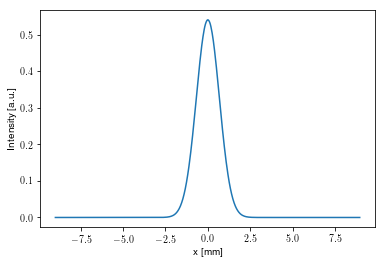

1.35735648356


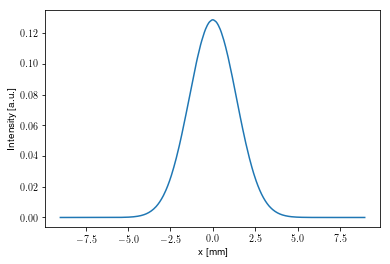

2.78326367516


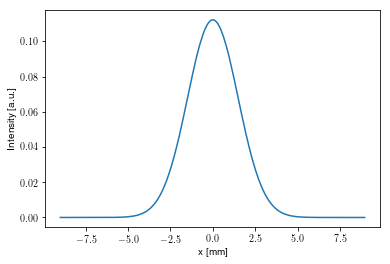

2.98056621451


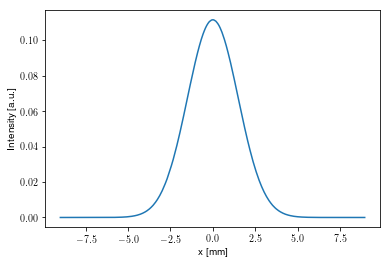

2.98925591719


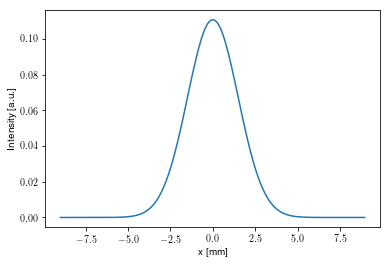

2.99848739498


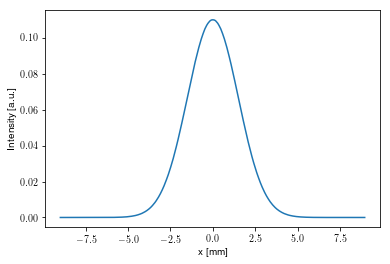

3.00825607448


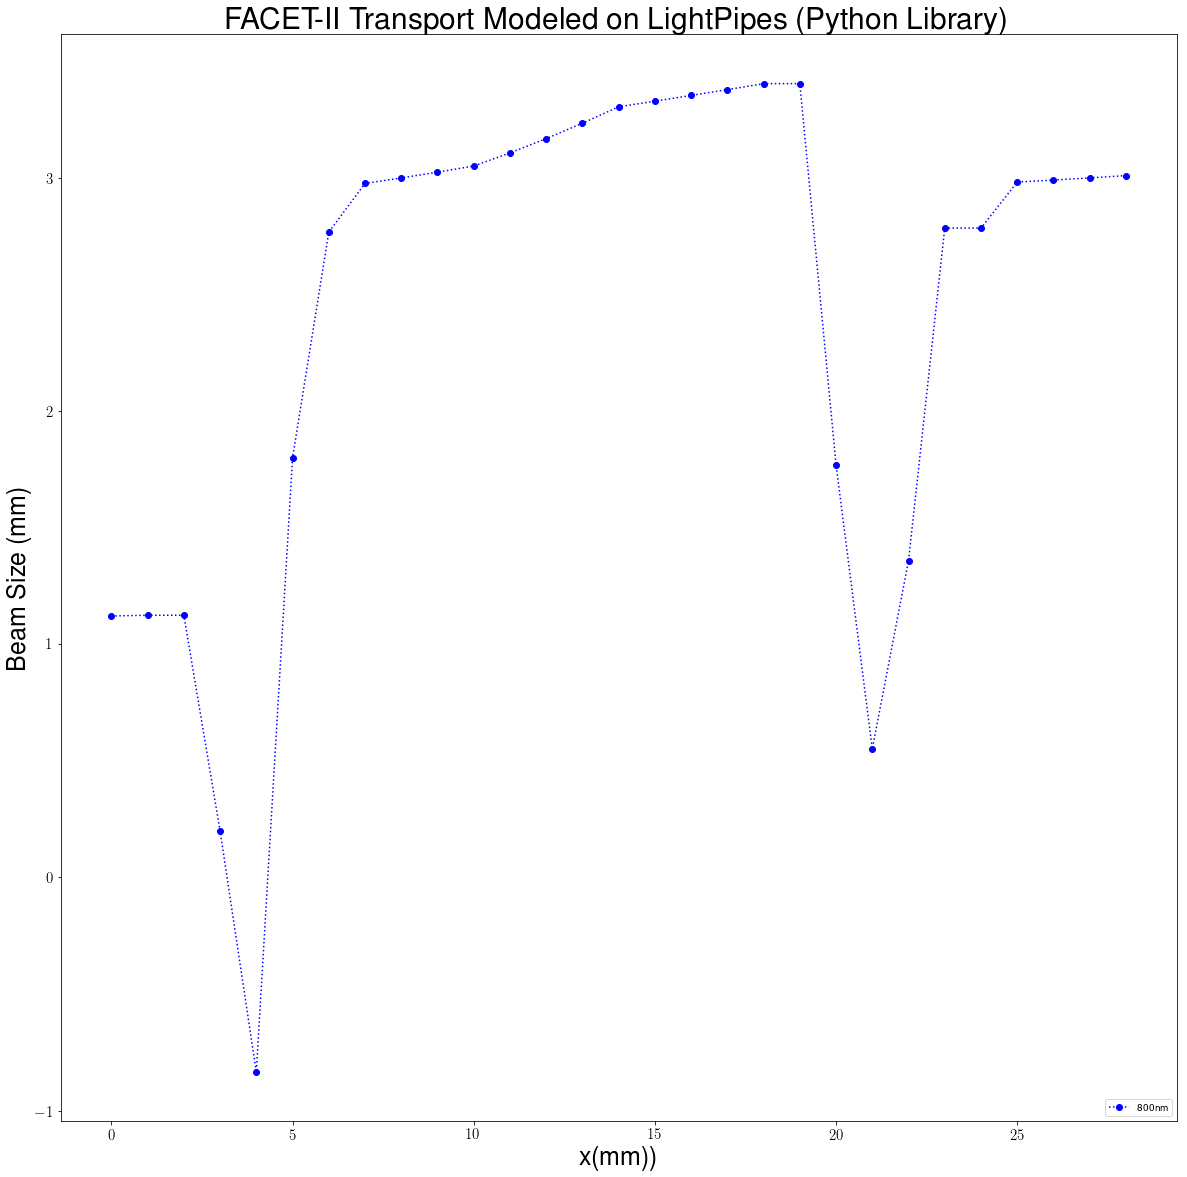

In [111]:
GridSize = 18*mm
GridDimension = 2000
lambda_ = 800*nm

waist_values_tisaph = []
pos = []

#ask brendan about this
R=(1)*mm
xs =0;ys=0
Field = Begin(GridSize, lambda_, GridDimension)

#Field = GaussAperture(R,xs,ys,1,Field)
Field = GaussHermite(0, 0, 1, R, Field)



Field = Forvard(2000*mm, Field)
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values_tisaph.append(2*popt[2])


Field = Forvard(27*mm, Field)
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values_tisaph.append(2*popt[2])

f1 = 568*mm
f2 = 1600*mm
f_relay = 6200*mm
#let's put the lens
Field = Lens(f1,0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 
arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values_tisaph.append(2*popt[2])

drift_l1_m2 = [517]*4


for i in drift_l1_m2:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])
    
Field = Forvard(100*mm, Field)   
Field = Lens(f2,0,0,Field)

drift_l2_m3 = [770.5]*4

for i in drift_l2_m3:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])

drift_insidegallery = [1530.25]*4

for i in drift_insidegallery:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])

drift_m3_l4 = [503.075]*4

for i in drift_m3_l4:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])
    
Field = Lens(f_relay, 0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values_tisaph.append(2*popt[2])

Field = Forvard(381.7*mm, Field)

drift_iptable = [2934.575]*4

for i in drift_iptable:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])

Field = Forvard(381.7*mm, Field)

Field = Lens(f_relay, 0,0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
waist_values_tisaph.append(2*popt[2])

drift_l4_comp = [472.5]*4


for i in drift_l4_comp:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values_tisaph.append(2*popt[2])

plt.figure(figsize=(20,20))
plt.plot(waist_values_tisaph, linestyle = ':', marker = 'o', color = 'blue', label = '800nm')
#plt.plot(waist_values, linestyle = ':', marker = '^', color = 'orange', label = '527nm', markersize=10)
plt.xlabel('x(mm))', fontsize=25)
plt.ylabel('Beam Size (mm)',fontsize=25)
plt.title('FACET-II Transport Modeled on LightPipes (Python Library)',fontsize=30)
plt.tick_params(axis = 'both', labelsize=15)
plt.legend(loc = 'lower right')

In [86]:
raleigh_range(1, 800)

3926.9908169872419

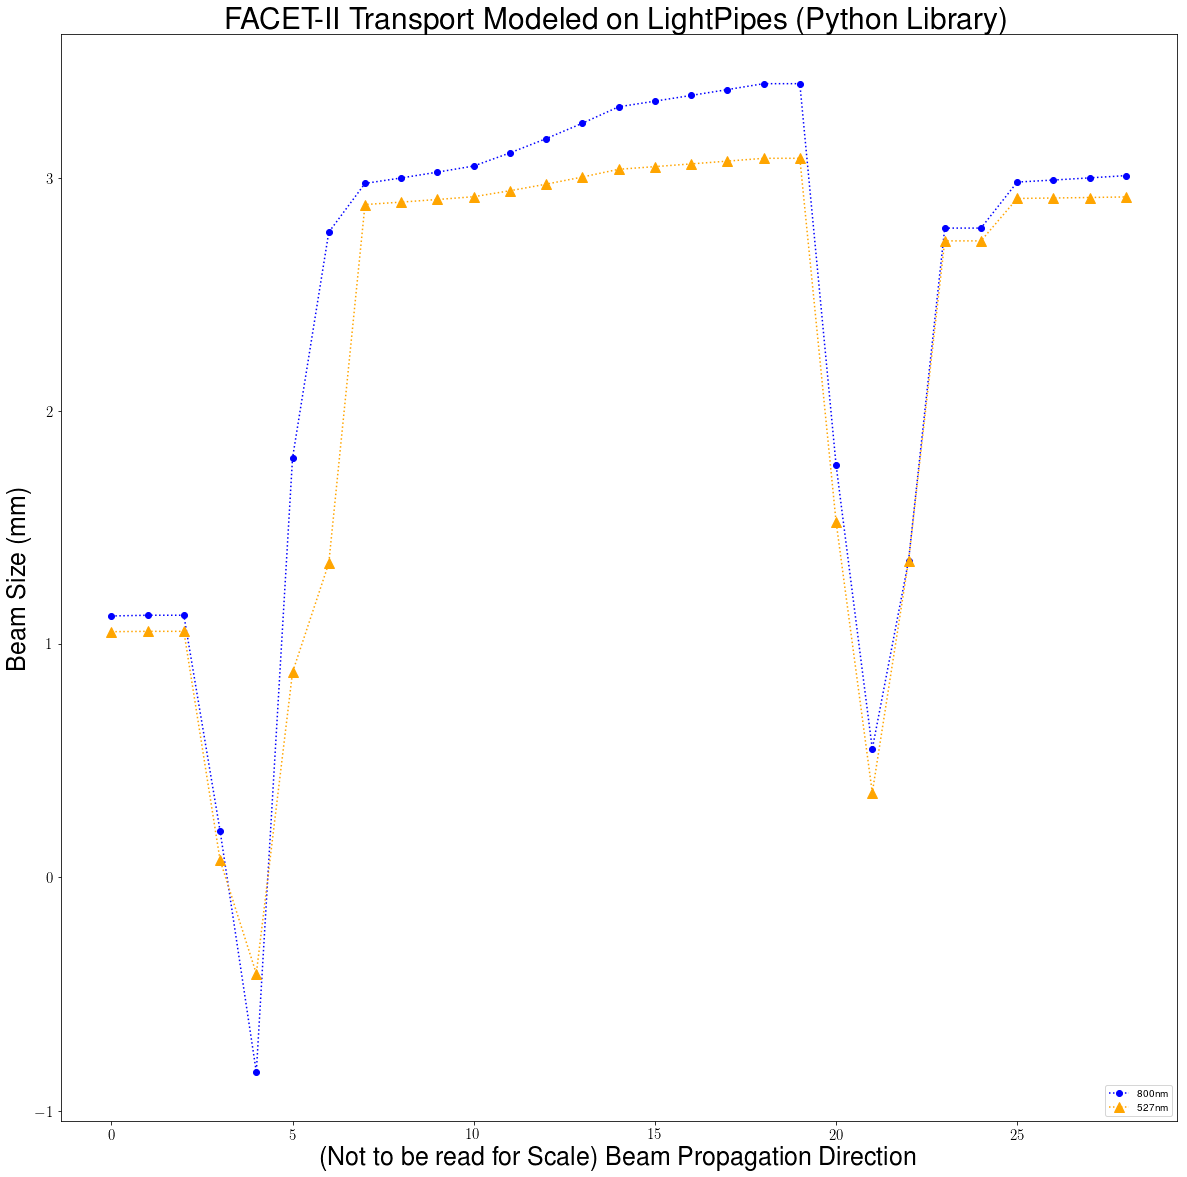

In [112]:
plt.figure(figsize=(20,20))
plt.plot(waist_values_tisaph, linestyle = ':', marker = 'o', color = 'blue', label = '800nm')
plt.plot(waist_values, linestyle = ':', marker = '^', color = 'orange', label = '527nm', markersize=10)
plt.xlabel('(Not to be read for Scale) Beam Propagation Direction', fontsize=25)
plt.ylabel('Beam Size (mm)',fontsize=25)
plt.title('FACET-II Transport Modeled on LightPipes (Python Library)',fontsize=30)
plt.tick_params(axis = 'both', labelsize=15)
plt.legend(loc = 'lower right')

Waists
element_id    HeNe     Ti:Saph       dx
0       1.05319804627 1.120538417 0.0673403707309
1       1.05319804627 1.120538417 0.0673403707309
2       0.0736745557208 0.0994331647488 0.0257586090279
3       -0.412706061525 -0.416726844478 0.00402078295343
4       0.878635971369 0.897342542749 0.0187065713796
5       1.34553062997 1.38006313497 0.034532505
6       2.8813653101 2.96856766372 0.0872023536255
7       2.89168636478 2.99160642586 0.0999200610834
8       2.90269888506 3.0160812994 0.113382414332
9       2.91439443215 3.0419612546 0.127566822449
10       2.93961439682 3.09737844472 0.157764047901
11       2.96742910705 3.15790626019 0.190477153137
12       2.9977651938 3.22325622636 0.225491032564
13       3.03054737323 3.2931393339 0.262591960668
14       3.04184557358 3.31706038491 0.275214811335
15       3.0533970819 3.34143117935 0.288034097449
16       3.06519904308 3.36623724125 0.30103819817
17       3.07724762764 3.39147722485 0.314229597215
18       3.07724762764 

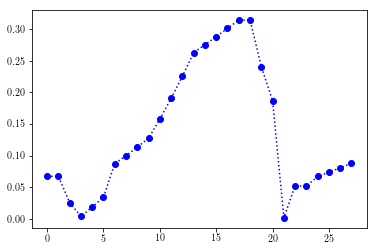

In [93]:
diff_w = []
print('Waists') 
print('element_id   ', "HeNe    ", "Ti:Saph", "     ", "dx")
for i in range(len(waist_values_tisaph)):
    diff_w.append(np.abs(waist_values_tisaph[i]-waist_values[i]))
    print(i,'     ', waist_values[i], waist_values_tisaph[i], np.abs(waist_values_tisaph[i]-waist_values[i]))
    
plt.plot(diff_w,linestyle = ':', marker = 'o', color = 'blue')


3.92699081699
